In [1]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename="/content/drive/MyDrive/CODING_DOJO/CÓDIGO/WEEK2/PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions (1).csv"
df=pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
mean_weight=df['Item_Weight'].mean()

In [7]:
df.loc[0:8523, ['Item_Weight']].fillna(df['Item_Weight'].mean()).head(100)

,Item_Weight
0,9.300000
1,5.920000
2,17.500000
3,19.200000
4,8.930000
...,...
95,12.857645
96,12.150000
97,8.750000
98,12.857645


In [8]:
df.groupby(['Outlet_Size'])[['Item_Identifier']].count()

,Item_Identifier
Outlet_Size,
High,932
Medium,2793
Small,2388


In [9]:
df.dropna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
#Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando 
#(análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

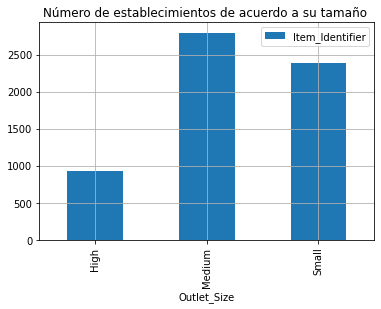

In [11]:
#Número de establecimientos de acuerdo a su tamaño 
df.groupby(['Outlet_Size'])[['Item_Identifier']].count().plot(kind="bar")
plt.title('Número de establecimientos de acuerdo a su tamaño ')
plt.grid()

In [12]:
serie=df.Outlet_Size.value_counts()

Text(0.5, 1.0, 'Proporción de tiendas ')

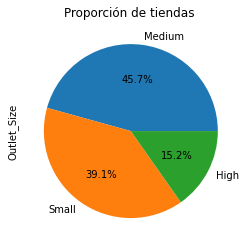

In [13]:
#proporción de tiendas 
serie.plot.pie(autopct="%1.1f%%")
plt.title('Proporción de tiendas ')


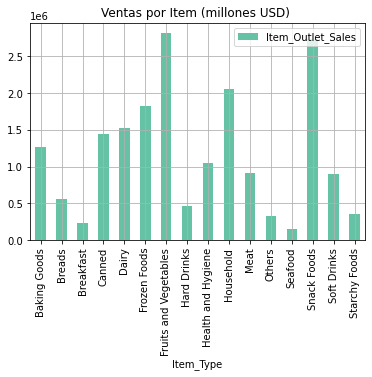

In [14]:
#Ventas por tipo de item 
df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().plot(kind="bar",cmap="Set2")
plt.title('Ventas por Item (millones USD) ')
plt.grid()

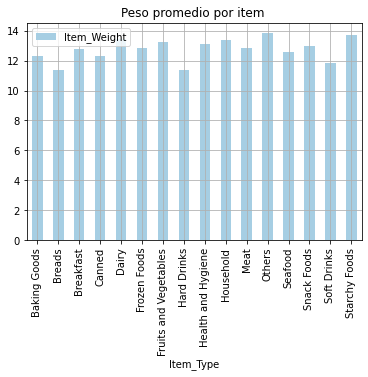

In [15]:
#Peso promedio de acuerdo al tipo de item
df.groupby(['Item_Type'])[['Item_Weight']].mean().plot(kind="bar",cmap="Paired")
plt.title('Peso promedio por item ')
plt.grid()

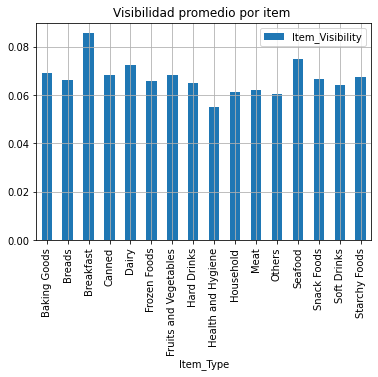

In [16]:
#Porcentaje medio de visibilidad por tipo de Item
df.groupby(['Item_Type'])[['Item_Visibility']].mean().plot(kind="bar")
plt.title('Visibilidad promedio por item ')
plt.grid()

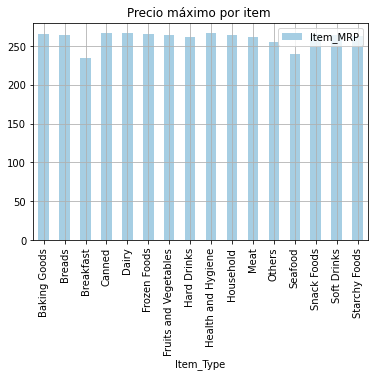

In [17]:
#precio máximo por tipo de Item
df.groupby(['Item_Type'])[['Item_MRP']].max().plot(kind="bar",cmap="Paired")
plt.title('Precio máximo por item ')
plt.grid()

#*Parte 4*

In [ ]:
#Histogramas para ver la distribución de varias características en tu conjunto de datos

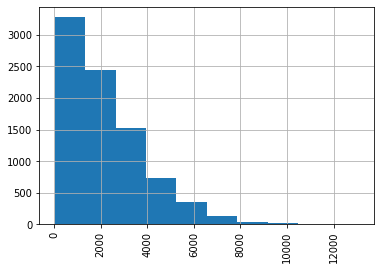

In [23]:
import matplotlib.pyplot as plt
sales = df.loc[:, 'Item_Outlet_Sales'].hist()
sales
plt.xticks(rotation = 90)
plt.ticklabel_format(useOffset=False, style='plain')

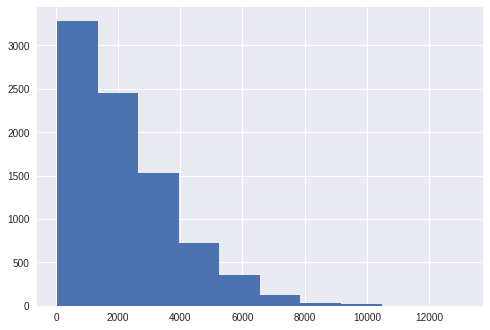

In [30]:
plt.style.use('seaborn')
price_filter = df.loc[:, 'Item_Outlet_Sales'] <= 1000000
df.loc[price_filter, 'Item_Outlet_Sales'].hist()

plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
#Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


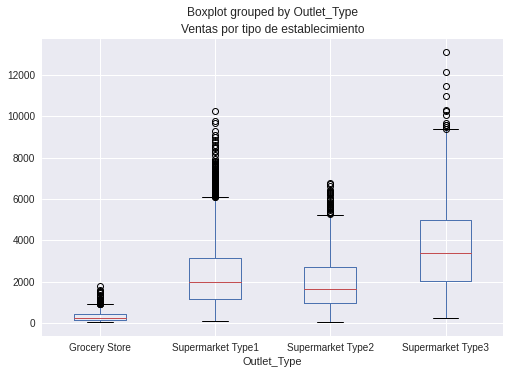

In [35]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type');
plt.title('Ventas por tipo de establecimiento');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


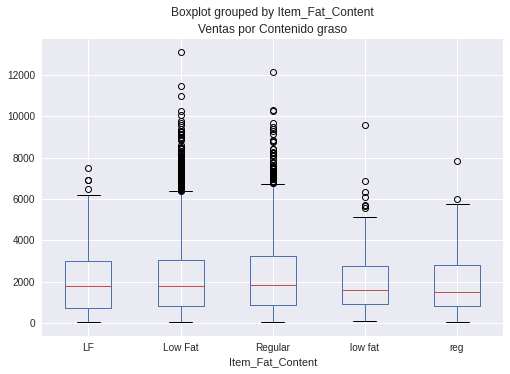

In [36]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content');
plt.title('Ventas por Contenido graso');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


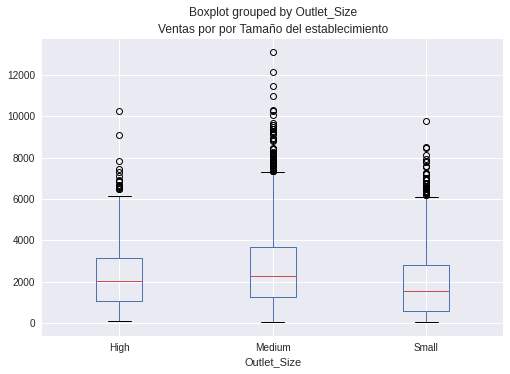

In [37]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size');
plt.title('Ventas por por Tamaño del establecimiento');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

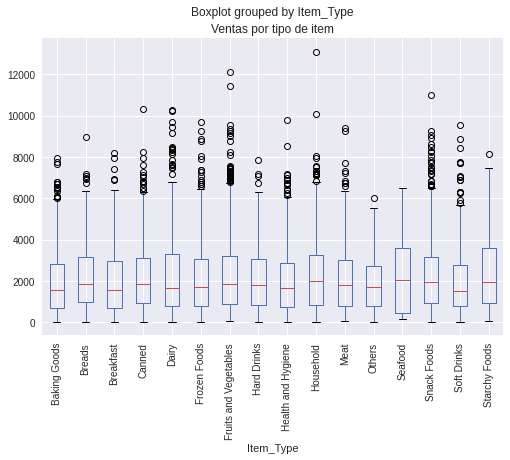

In [40]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type');
plt.title('Ventas por tipo de item');
plt.xticks(rotation = 90)
